In [108]:
#memasukan library
import os,zipfile
import pandas as pd

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/LanguageIdentificationdataset.csv')

In [110]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [111]:
#cek value setiap language
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [112]:
# Mengambil 4 language saja
df = df[~df['language'].isin(['Arabic', 'Thai', 'Turkish', 'Urdu', 'Chinese', 'Dutch',	'Estonian', 'French', 'Hindi', 'Japanese', 'Korean', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Swedish', 'Tamil'])]
df['language'].value_counts()

Latin         1000
Indonesian    1000
Spanish       1000
English       1000
Name: language, dtype: int64

In [113]:
category = pd.get_dummies(df.language)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='language')
df_baru

,Text,English,Indonesian,Latin,Spanish
7,müller mox figura centralis circulorum doctoru...,0,0,1,0
10,kemunculan pertamanya adalah ketika mencium ka...,0,1,0,0
21,en navidad de poco después de que interpretó ...,0,0,0,1
34,walter kaudern dalam bukunya menyatakan wawo l...,0,1,0,0
35,imprimat psalterium quzhayae librum primum imp...,0,0,1,0
...,...,...,...,...,...
21959,para colmo las tropas albanesas atacaban conti...,0,0,0,1
21975,fue fundado el de octubre de el día de ese ...,0,0,0,1
21983,el investigador ha recibido varios reconocimie...,0,0,0,1
21987,felidae adalah familia mamalia yang berevolusi...,0,1,0,0


In [114]:
teks = df_baru['Text'].values
label = df_baru[['Latin', 'Indonesian', 'Spanish', 'English']].values

In [115]:
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=100,
                             truncating='post')
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=100,
                            truncating='post')

In [117]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

Adam(learning_rate=0.00146, name='Adam')
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_8 (LSTM)               (None, 64)                20736     
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 516       
                                                                 
Total params: 109,572
Trainable params: 109,572
Non-trainable params: 0
_________________________________________________________________


In [118]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\nTraining dihentikan karena accuracy telah mencapai 90%")
      self.model.stop_training = True

callbacks = myCallback()

In [119]:
history = model.fit(
    padded_latih,
    label_latih,
    epochs=30, 
    validation_data=(padded_test, label_test),
    #validation_steps=30,
    verbose=2,
    batch_size=27,
    callbacks=[callbacks]
)

Epoch 1/30
119/119 - 6s - loss: 1.1818 - accuracy: 0.3706 - val_loss: 0.8186 - val_accuracy: 0.5125 - 6s/epoch - 50ms/step
Epoch 2/30
119/119 - 4s - loss: 0.8233 - accuracy: 0.4828 - val_loss: 0.7817 - val_accuracy: 0.5213 - 4s/epoch - 34ms/step
Epoch 3/30
119/119 - 4s - loss: 1.2000 - accuracy: 0.3706 - val_loss: 1.3840 - val_accuracy: 0.2825 - 4s/epoch - 34ms/step
Epoch 4/30
119/119 - 4s - loss: 1.3805 - accuracy: 0.3103 - val_loss: 1.3795 - val_accuracy: 0.3338 - 4s/epoch - 34ms/step
Epoch 5/30
119/119 - 4s - loss: 1.2373 - accuracy: 0.3675 - val_loss: 0.8978 - val_accuracy: 0.4975 - 4s/epoch - 34ms/step
Epoch 6/30
119/119 - 4s - loss: 0.9869 - accuracy: 0.4572 - val_loss: 1.0145 - val_accuracy: 0.4400 - 4s/epoch - 34ms/step
Epoch 7/30
119/119 - 4s - loss: 1.0278 - accuracy: 0.4822 - val_loss: 1.0059 - val_accuracy: 0.4387 - 4s/epoch - 34ms/step
Epoch 8/30
119/119 - 4s - loss: 0.8859 - accuracy: 0.5194 - val_loss: 0.8158 - val_accuracy: 0.4950 - 4s/epoch - 33ms/step
Epoch 9/30
119/1

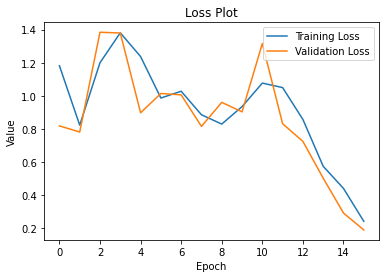

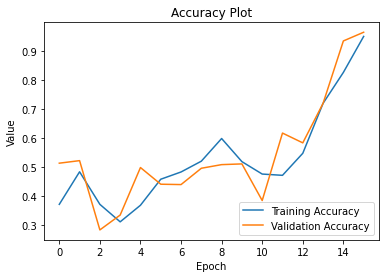

In [120]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

#Nama : Abdul Mukhit Murtadho
#Email : muchitabdul11@gmail.com
#No. Registrasi : 1494037162101-2090